In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [34]:
path = '/Users/z/Documents/CF/Unit 1/6. Advanced Analytics & Dashboard Design'

In [35]:
df = pd.read_pickle(os.path.join(path, 'Gun Violence Project','02 Data','Prepared data','gun-violence-data_full.pkl'))

Cleaning data

In [36]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

### extrme values check

/var/folders/bm/sy5rkj0n3p1902v_mvhwfrth0000gn/T/ipykernel_17865/247367641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['n_killed'], bins=25) # Shows extreme values


<Axes: xlabel='n_killed', ylabel='Density'>

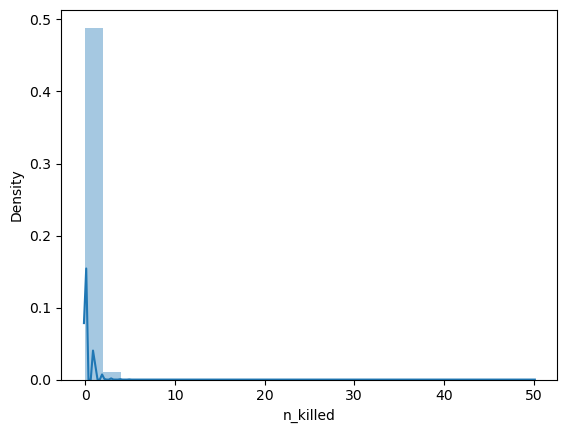

In [37]:
sns.distplot(df['n_killed'], bins=25) # Shows extreme values


In [38]:
df['n_killed'].mean() # Check the mean

0.25228953967214207

In [39]:
df['n_killed'].median() # Check the median

0.0

In [40]:
df['n_killed'].max() # Check the max

50

### Data prep for regression analysis 

#### Hypothesis would be the check if there is a correlation between the number of guns involved and the number of deaths

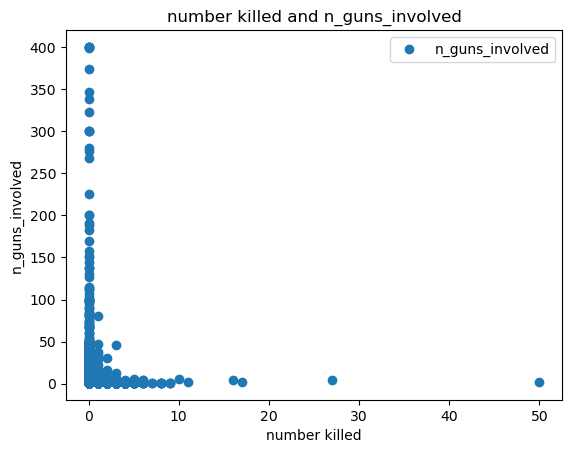

In [41]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'n_killed', y='n_guns_involved',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('number killed and n_guns_involved')  
plt.xlabel('number killed')  
plt.ylabel('n_guns_involved')  
plt.show()

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['n_killed'].values.reshape(-1,1)
y = df['n_guns_involved'].values.reshape(-1,1)

In [43]:
df['n_killed']

0         0
1         1
2         1
3         4
4         2
         ..
239672    0
239673    1
239674    0
239675    1
239676    2
Name: n_killed, Length: 239677, dtype: int64

In [44]:
df['n_guns_involved']

0         1.0
1         1.0
2         2.0
3         1.0
4         2.0
         ... 
239672    1.0
239673    1.0
239674    1.0
239675    1.0
239676    2.0
Name: n_guns_involved, Length: 239677, dtype: float64

In [45]:
# convert n_killed to numeric values 
df["n_killed"] = pd.to_numeric(df["n_killed"])


In [46]:
df['n_killed']

0         0
1         1
2         1
3         4
4         2
         ..
239672    0
239673    1
239674    0
239675    1
239676    2
Name: n_killed, Length: 239677, dtype: int64

In [48]:
y

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [49]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### regression analysis

In [54]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [55]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

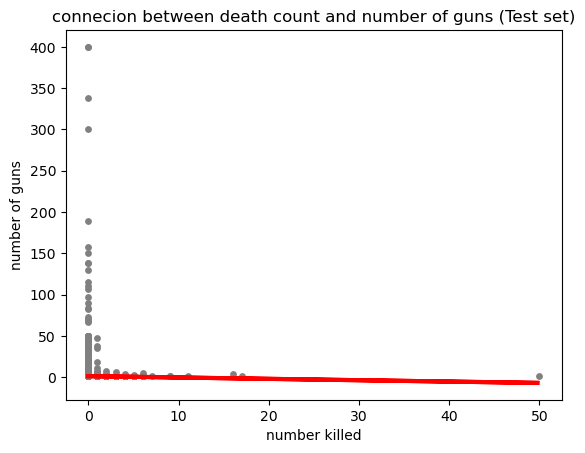

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('connecion between death count and number of guns (Test set)')
plot_test.xlabel('number killed')
plot_test.ylabel('number of guns')
plot_test.show()

In [ ]:
# major insights were not spotted during this analysis. 
# there is a downward trend however major conclusions can not be drawn from this analysis. 

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.16446366]]
Mean squared error:  12.64195930897477
R2 score:  0.00036263029903871313


In [62]:
y_predicted

array([[1.26240252],
       [0.60454789],
       [1.26240252],
       ...,
       [1.26240252],
       [1.26240252],
       [1.26240252]])

In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.0,1.262403
1,1.0,0.604548
2,1.0,1.262403
3,1.0,1.262403
4,1.0,1.262403
5,1.0,1.262403
6,1.0,1.262403
7,1.0,1.097939
8,1.0,1.262403
9,1.0,1.262403


###### final words: the analysisand prediction did not yield any acurate results or something we can count on for the future. The data we work with however was also not the best in terms of its size, quality and variance. 
